<a href="https://colab.research.google.com/github/aLL3H/kmeans/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [ ]:
iris = datasets.load_iris()
iris

In [ ]:
def plot_clusters(data, labels, title):
  colors = ['red','green', 'purple', 'black']
  plt.figure(figsize=(8,4))
  for i,c,l in zip(range(-1,3), colors, ['Noise', 'Setosa', 'Versicolor', 'Virginica']):
    if i == -1:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c = colors[i], label = l, alpha = 0.5, s = 50, marker = 'x')
    else:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c = colors[i], label = l, alpha = 0.5, s = 50)
  plt.legend()
  plt.title(title)
  plt.xlabel('Comprimento Sépala')
  plt.ylabel('Largura da Pétala')
  plt.show()

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


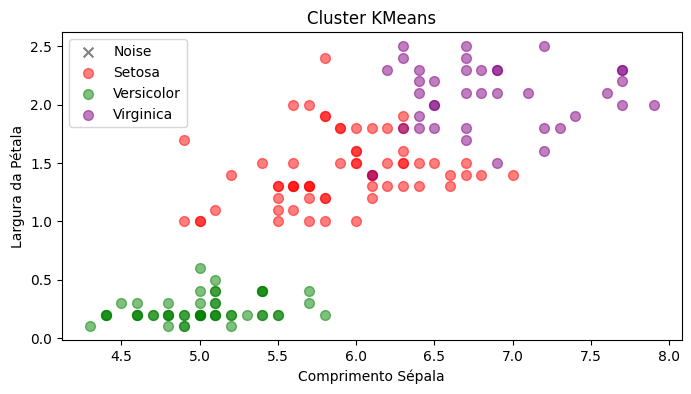

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(iris.data)
print(kmeans.labels_)
resultados = confusion_matrix(iris.target, kmeans.labels_)
print(resultados)

plot_clusters(iris.data, kmeans.labels_, 'Cluster KMeans')

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


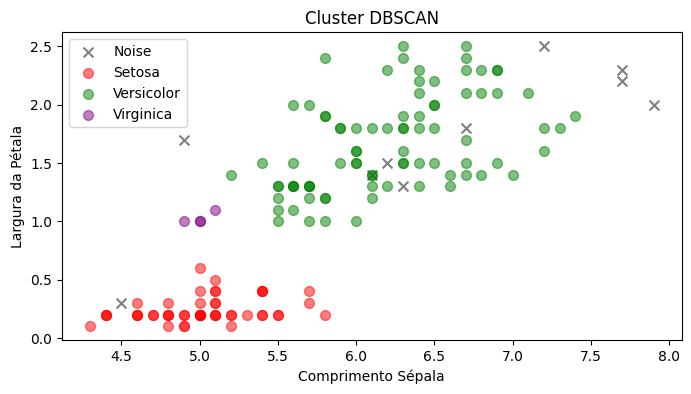

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(iris.data)
print(dbscan_labels)

plot_clusters(iris.data, dbscan_labels, 'Cluster DBSCAN')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


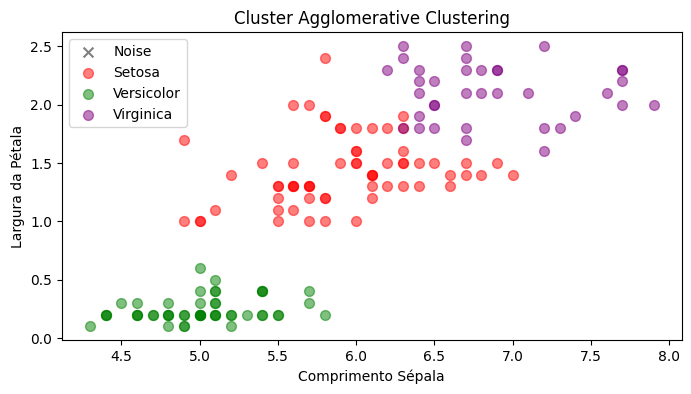

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(iris.data)
print(agglo_labels)
plot_clusters(iris.data, agglo_labels, 'Cluster Agglomerative Clustering')
#resultados = confusion_matrix(iris.target, agglo_labels)
#print(resultados)

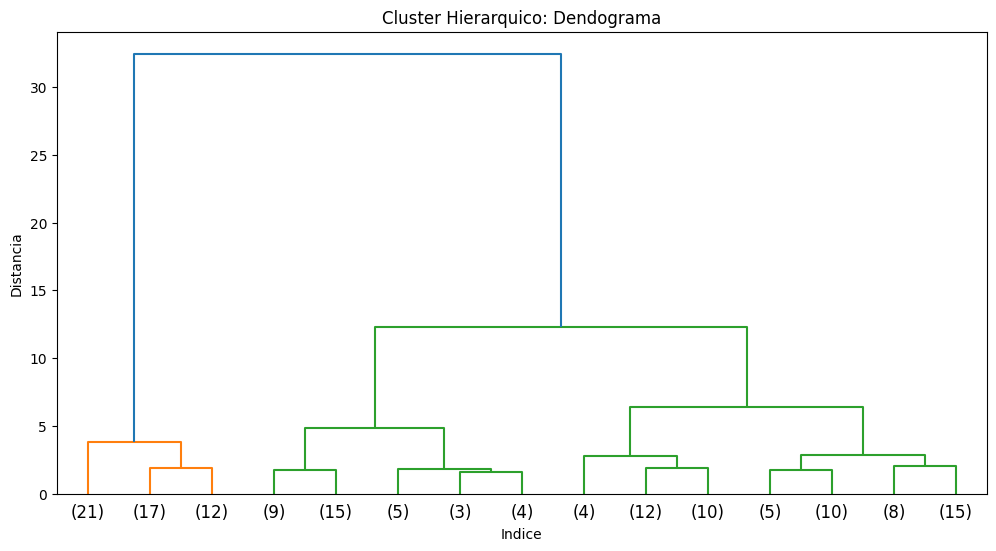

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Cluster Hierarquico: Dendograma")
plt.xlabel("Indice")
plt.ylabel("Distancia")
linkage_metrics = hierarchy.linkage(iris.data, method="ward")
hierarchy.dendrogram(linkage_metrics, truncate_mode="lastp", p=15)
plt.show()